In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/concept of Technology of AI/Copy of Titanic-Dataset.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
categorical_columns = data.select_dtypes(include='object').columns
data = data.drop(columns=[col for col in categorical_columns if col!='Survived'])
data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
missing_info =data.isnull().sum()/len(data)*100
missing_info

,0
PassengerId,0.00000
Survived,0.00000
Pclass,0.00000
Age,19.86532
SibSp,0.00000
Parch,0.00000
Fare,0.00000


In [4]:
import pandas as pd
import numpy as np

Problem - 1: Perform a classification task with knn from scratch.

1.Load the Dataset: • Read the dataset into a pandas DataFrame

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Copy of diabetes_.csv');
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).

In [6]:

#  Finding all datas
print(df.info())

print()## for spaces

# Finding Missing values
print(df.isnull().sum())

print()

# Finding Summary statistics
print(df.describe(include="all"))

print()

# Finding Shape
print(df.shape)

print()

# 6. finding names
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                     

2.Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [7]:
df.isnull().sum()#find missing data

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Drop unwanted columns safely
df = df.drop(
    columns=["bp.2s", "bp.2d", "location", "id", "chol", "stab.glu",
             "hdl", "glyhb", "bp.1s", "bp.1d", "time.ppn", "age"],
    errors="ignore"
)

# Handle frame column
if "frame" in df.columns:
    df["frame"] = df["frame"].fillna(df["frame"].mode()[0])
    df["frame"] = df["frame"].map({"small": 0, "medium": 1, "large": 2})

# Handle gender column
if "gender" in df.columns:
    df["gender"] = df["gender"].map({"male": 0, "female": 1})

# Fill numeric columns with median
num_cols = ["ratio", "height", "weight", "waist", "hip"]
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

df.head()



,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [13]:
df.isnull().sum()

,0
pregnancies,0
glucose,0
bloodpressure,0
skinthickness,0
insulin,0
bmi,0
diabetespedigreefunction,0
outcome,0


3.Feature Engineering:
• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [20]:
import numpy as np
import pandas as pd

#1️Clean column names (safe habit)
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

print("Columns in dataset:")
print(df.columns.tolist())

# 2️⃣ Separate FEATURES (X) and TARGET (y)
X = df.drop(columns=["outcome"]).values
y = df["outcome"].values

print("X shape:", X.shape)
print("y shape:", y.shape)


Columns in dataset:
['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'outcome']
X shape: (768, 7)
y shape: (768,)


In [21]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets from scratch.
    """

    np.random.seed(random_seed)

    # Generate array of indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Determine test size
    test_count = int(len(X) * test_size)

    # Split indices
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    # Create train and test sets
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    #Printing the results
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    return X_train, X_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_scratch(x, y)



X_train shape: (538, 0)
X_test shape: (230, 0)
y_train shape: (538,)
y_test shape: (230,)


4.Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [23]:

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """

    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")


    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

euclidean_distance(x[0], x[1])

np.float64(0.0)

In [25]:
try:

    point1 = np.array([3, 4])
    point2 = np.array([0, 0])


    result = euclidean_distance(point1, point2)


    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Test passed successfully!


In [27]:

def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """

    distances = [euclidean_distance(query, x) for x in X_train]


    sorted_indices = np.argsort(distances)


    nearest_indices = sorted_indices[:k]


    nearest_labels = y_train[nearest_indices]


    prediction = np.bincount(nearest_labels).argmax()

    return prediction

In [28]:

def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """

    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

In [29]:

try:

    X_test_sample = x_test[:5]
    y_test_sample = y_test[:5]


    predictions = knn_predict(X_test_sample, x_train, y_train, k=3)


    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)


    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Predictions: [1 1 1 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


In [30]:

def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy



try:

    predictions = knn_predict(x_test, x_train, y_train, k=3)


    accuracy = compute_accuracy(y_test, predictions)


    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 34.78%


In [31]:
for k in [1, 3, 5, 7, 9, 11,13,15,16,17,18,20]:
    preds = knn_predict(x_test, x_train, y_train, k)
    acc = np.mean(preds == y_test)
    print(f"k = {k} -> Accuracy = {acc*100:.2f}%")

k = 1 -> Accuracy = 34.78%
k = 3 -> Accuracy = 34.78%
k = 5 -> Accuracy = 65.22%
k = 7 -> Accuracy = 34.78%
k = 9 -> Accuracy = 34.78%
k = 11 -> Accuracy = 34.78%
k = 13 -> Accuracy = 34.78%
k = 15 -> Accuracy = 65.22%
k = 16 -> Accuracy = 65.22%
k = 17 -> Accuracy = 65.22%
k = 18 -> Accuracy = 65.22%
k = 20 -> Accuracy = 65.22%


Accuracy for k=1: 34.78%
Accuracy for k=2: 65.22%
Accuracy for k=3: 34.78%
Accuracy for k=4: 65.22%
Accuracy for k=5: 65.22%
Accuracy for k=6: 65.22%
Accuracy for k=7: 34.78%
Accuracy for k=8: 34.78%
Accuracy for k=9: 34.78%
Accuracy for k=10: 34.78%
Accuracy for k=11: 34.78%
Accuracy for k=12: 34.78%
Accuracy for k=13: 34.78%
Accuracy for k=14: 65.22%
Accuracy for k=15: 65.22%
Accuracy for k=16: 65.22%
Accuracy for k=17: 65.22%
Accuracy for k=18: 65.22%
Accuracy for k=19: 65.22%
Accuracy for k=20: 65.22%


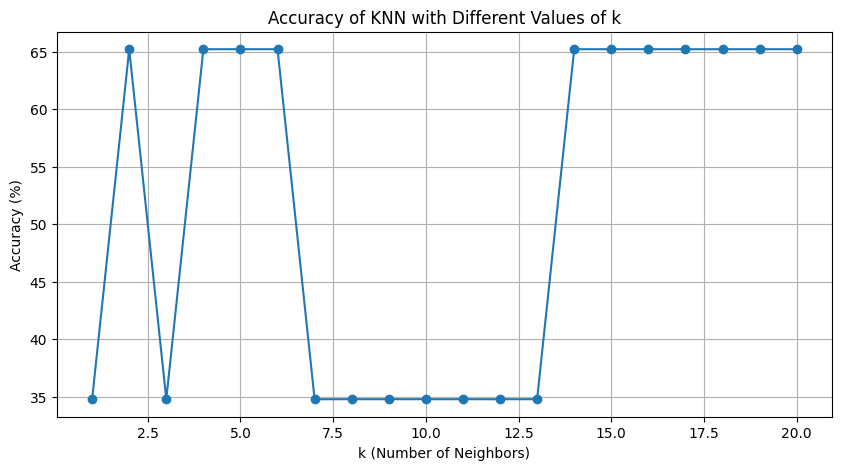

Experiment completed. Check the plot for the accuracy trend.


In [32]:
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:

        predictions = knn_predict(X_test, X_train, y_train, k=k)
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy

        print(f"Accuracy for k={k}: {accuracy:.2f}%")


    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies


k_values = range(1, 21)


try:
    accuracies = experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")


Experiment completed. Check the plot for the accuracy trend.
Problem - 2 - Experimentation:

Repeat the Classification Task: • Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

In [33]:

def min_max_scale(X):
    """
    Manually scale the feature matrix X using min-max scaling.
    Returns the scaled version of X.
    """
    X_min = X.min(axis=0)       # minimum of each column
    X_max = X.max(axis=0)       # maximum of each column

    return (X - X_min) / (X_max - X_min)

x_scaled = min_max_scale(x)
x_scaled

array([], shape=(768, 0), dtype=float64)

In [35]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split_scratch(x_scaled, y)

X_train shape: (538, 0)
X_test shape: (230, 0)
y_train shape: (538,)
y_test shape: (230,)


In [37]:
y_pred_scaled = knn_predict(x_test_s, x_train_s, y_train_s, k=3)
y_pred_scaled

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
accuracy_scaled = np.mean(y_pred_scaled == y_test_s)
accuracy_scaled

np.float64(0.34782608695652173)

Accuracy for k=1: 34.78%
Accuracy for k=2: 65.22%
Accuracy for k=3: 34.78%
Accuracy for k=4: 65.22%
Accuracy for k=5: 65.22%
Accuracy for k=6: 65.22%
Accuracy for k=7: 34.78%
Accuracy for k=8: 34.78%
Accuracy for k=9: 34.78%
Accuracy for k=10: 34.78%
Accuracy for k=11: 34.78%
Accuracy for k=12: 34.78%
Accuracy for k=13: 34.78%
Accuracy for k=14: 65.22%
Accuracy for k=15: 65.22%
Accuracy for k=16: 65.22%
Accuracy for k=17: 65.22%
Accuracy for k=18: 65.22%
Accuracy for k=19: 65.22%
Accuracy for k=20: 65.22%


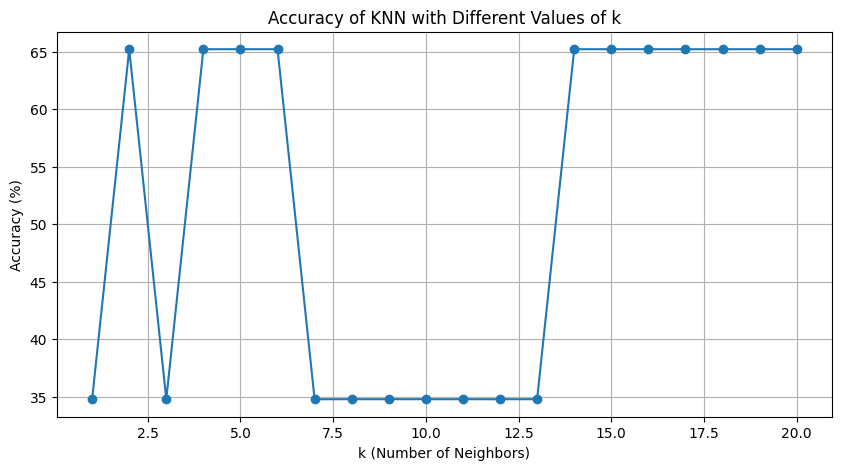

Experiment completed. Check the plot for the accuracy trend.


In [41]:
k_values = range(1, 21)
try:
    accuracies = experiment_knn_k_values(x_train_s, y_train_s, x_test_s, y_test_s, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")

Problem - 3 - Experimentation with k:

Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

Visualize the Results:
• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

In [45]:
import time

k_values = range(1, 16)

scaled_accuracy = []
unscaled_accuracy = []
time_unscaled = []
time_scaled = []

for kk in k_values:
    # Unscaled
    start = time.time()
    unscaled_pred = knn_predict(x_test, x_train, y_train, kk)
    end = time.time()

    unscaled_accuracy.append(compute_accuracy(y_test, unscaled_pred))
    time_unscaled.append(end - start)

    # Scaled
    start = time.time()
    scaled_pred = knn_predict(x_test_s, x_train_s, y_train, kk)
    end = time.time()

    scaled_accuracy.append(compute_accuracy(y_test, scaled_pred))
    time_scaled.append(end - start)

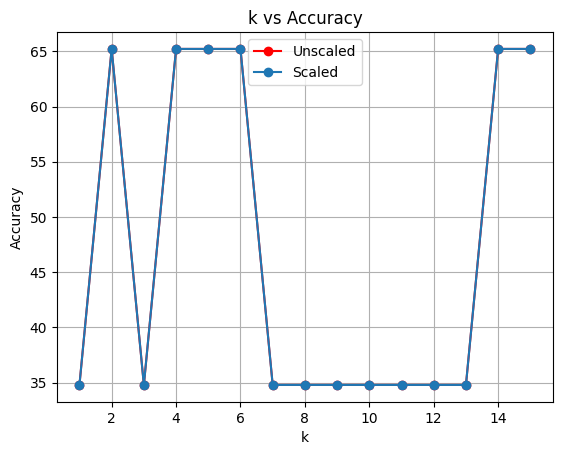

In [44]:
plt.plot(k_values, unscaled_accuracy, marker='o', label='Unscaled', color='red')
plt.plot(k_values, scaled_accuracy, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()